In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('./total_1.csv')
df

,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,주당순손익,총자본회전률,회계년도,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,58820,2.210,0.000,20.0,17751704.0,-8.50,56.40,376118.0,640283.0,0.97,785.0,-35.0,0.66,2011,(주)CMG제약,0.506132,1,69.426752,1,0.000000
1,58820,2.555,0.000,20.0,16255389.0,-40.97,-8.43,401085.0,-4205503.0,0.66,1330.0,-138.0,0.39,2012,(주)CMG제약,0.803292,1,-29.924812,0,0.000000
2,58820,2.945,375.055,20.0,20402140.0,1.45,25.51,243898.0,791250.0,0.51,932.0,0.0,0.36,2013,(주)CMG제약,0.140951,0,-2.145923,0,14.256033
3,58820,2.855,646.030,20.0,22752584.0,0.69,11.52,215128.0,442322.0,0.46,912.0,2.0,0.40,2014,(주)CMG제약,0.184647,2,131.359649,1,23.557141
4,58820,5.915,0.000,20.0,27041894.0,-13.50,18.85,195671.0,-2572168.0,0.56,2110.0,-42.0,0.47,2015,(주)CMG제약,0.207355,2,50.710900,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,25530,0.630,7.085,30.0,185141914.0,13.39,14.33,0.0,23545362.0,0.88,5810.0,0.0,0.74,2015,(주)에스제이엠홀딩스,0.098414,2,-10.154905,0,0.101062
9707,25530,0.630,14.515,30.0,181367297.0,8.36,-2.04,0.0,13611422.0,0.81,5220.0,0.0,0.67,2016,(주)에스제이엠홀딩스,0.104776,2,-8.045977,0,0.066509
9708,25530,0.550,5.130,30.0,169845355.0,11.37,-6.35,0.0,10445486.0,0.72,4800.0,0.0,0.60,2017,(주)에스제이엠홀딩스,0.101177,1,-28.645833,0,0.203981
9709,25530,0.400,16.740,20.0,160740722.0,3.83,-5.36,0.0,1780439.0,0.66,3425.0,0.0,0.55,2018,(주)에스제이엠홀딩스,0.099447,2,-5.547445,0,-0.519606


In [3]:
for i in df.index:
    if pd.isna(df.loc[i, '수익률']) or df.loc[i, '수익률'] == '':
        df.drop(i, axis=0, inplace=True)

In [243]:
df.head(20)

,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,주당순손익,총자본회전률,회계년도,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,58820,2.210,0.000,20.0,1.775170e+07,-8.50,56.40,376118.0,640283.0,0.97,785.0,-35.0,0.66,2011,(주)CMG제약,0.506132,1,69.426752,1,0.000000
1,58820,2.555,0.000,20.0,1.625539e+07,-40.97,-8.43,401085.0,-4205503.0,0.66,1330.0,-138.0,0.39,2012,(주)CMG제약,0.803292,1,-29.924812,0,0.000000
2,58820,2.945,375.055,20.0,2.040214e+07,1.45,25.51,243898.0,791250.0,0.51,932.0,0.0,0.36,2013,(주)CMG제약,0.140951,0,-2.145923,0,14.256033
3,58820,2.855,646.030,20.0,2.275258e+07,0.69,11.52,215128.0,442322.0,0.46,912.0,2.0,0.40,2014,(주)CMG제약,0.184647,2,131.359649,1,23.557141
4,58820,5.915,0.000,20.0,2.704189e+07,-13.50,18.85,195671.0,-2572168.0,0.56,2110.0,-42.0,0.47,2015,(주)CMG제약,0.207355,2,50.710900,1,0.000000
5,58820,5.640,291.595,20.0,3.296982e+07,5.24,21.92,293082.0,1730753.0,0.45,3180.0,19.0,0.39,2016,(주)CMG제약,0.097641,2,96.226415,1,5.202494
6,58820,7.430,236.830,20.0,4.153559e+07,6.83,25.98,543322.0,1558607.0,0.42,6240.0,26.0,0.38,2017,(주)CMG제약,0.118681,2,-32.131410,0,1.752564
7,58820,7.185,113.690,30.0,4.986478e+07,12.16,20.05,505130.0,2567820.0,0.49,4235.0,0.0,0.45,2018,(주)CMG제약,0.099999,1,0.354191,0,2.302342
9,590,0.390,30.070,20.0,1.090460e+08,10.79,30.53,1839762.0,12311552.0,0.72,35400.0,10756.0,0.62,2011,CS홀딩스(주),0.050825,2,-4.943503,0,-0.512740
10,590,0.310,43.620,30.0,1.033568e+08,6.34,-5.22,1797730.0,7734678.0,0.62,33650.0,5708.0,0.54,2012,CS홀딩스(주),0.050697,0,7.429421,1,-0.749543


In [207]:
df['투자신호'].value_counts()

0    5042
1    3590
Name: 투자신호, dtype: int64

In [4]:
# 무한대 값 최고값으로 대체하기
df['PEG'][np.isinf(df['PEG'])] = np.finfo(float).max

C:\Users\seopa\AppData\Local\Temp\ipykernel_15092\1845390854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PEG'][np.isinf(df['PEG'])] = np.finfo(float).max


In [5]:
df['PEG'].value_counts()

 1.000000e+03     1615
 0.000000e+00      884
 1.797693e+308       9
 2.407982e-01        1
-7.858926e-01        1
                  ... 
 9.803093e-01        1
 5.809410e-02        1
 6.789600e-01        1
 5.017378e-01        1
-5.196063e-01        1
Name: PEG, Length: 6127, dtype: int64

In [6]:
from scipy.stats.mstats import winsorize
df['PEG'] = winsorize(df['PEG'], limits=[0.01, 0.01])

In [7]:
a = ['PBR', 'PER', '매출액', '매출액순이익률', '매출액증가율', '성장비용', '영업손익', '자기자본회전률', '주당순손익', '총자본회전률', '부채자본비율']

for col in a:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 9709
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   거래소코드    8632 non-null   int64  
 1   PBR      8632 non-null   float64
 2   PER      8632 non-null   float64
 3   기업규모코드   8632 non-null   float64
 4   매출액      8632 non-null   float64
 5   매출액순이익률  8632 non-null   float64
 6   매출액증가율   8632 non-null   float64
 7   성장비용     8632 non-null   float64
 8   영업손익     8632 non-null   float64
 9   자기자본회전률  8632 non-null   float64
 10  종가       8632 non-null   float64
 11  주당순손익    8632 non-null   float64
 12  총자본회전률   8632 non-null   float64
 13  회계년도     8632 non-null   int64  
 14  회사명      8632 non-null   object 
 15  부채자본비율   8632 non-null   float64
 16  현금흐름스코어  8632 non-null   int64  
 17  수익률      8632 non-null   float64
 18  투자신호     8632 non-null   int64  
 19  PEG      8632 non-null   float64
dtypes: float64(15), int64(4), object(1)
memory usage: 1.

In [248]:
df = df.set_index('회계년도')

In [249]:
df

,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
회계년도,,,,,,,,,,,,,,,,,,,
2011,58820,2.210,0.000,20.0,17751704.0,-8.50,56.40,376118.0,640283.0,0.97,785.0,-35.0,0.66,(주)CMG제약,0.506132,1,69.426752,1,0.000000
2012,58820,2.555,0.000,20.0,16255389.0,-40.97,-8.43,401085.0,-4205503.0,0.66,1330.0,-138.0,0.39,(주)CMG제약,0.803292,1,-29.924812,0,0.000000
2013,58820,2.945,375.055,20.0,20402140.0,1.45,25.51,243898.0,791250.0,0.51,932.0,0.0,0.36,(주)CMG제약,0.140951,0,-2.145923,0,14.256033
2014,58820,2.855,435.355,20.0,22752584.0,0.69,11.52,215128.0,442322.0,0.46,912.0,2.0,0.40,(주)CMG제약,0.184647,2,131.359649,1,23.557141
2015,58820,5.915,0.000,20.0,27041894.0,-13.50,18.85,195671.0,-2572168.0,0.56,2110.0,-42.0,0.47,(주)CMG제약,0.207355,2,50.710900,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,25530,0.635,9.805,30.0,161934964.0,10.45,-13.06,5748432.0,20730328.0,0.81,4660.0,0.0,0.69,(주)에스제이엠홀딩스,0.018116,2,24.678112,1,-2.618242
2015,25530,0.630,7.085,30.0,185141914.0,13.39,14.33,0.0,23545362.0,0.88,5810.0,0.0,0.74,(주)에스제이엠홀딩스,0.098414,2,-10.154905,0,0.101062
2016,25530,0.630,14.515,30.0,181367297.0,8.36,-2.04,0.0,13611422.0,0.81,5220.0,0.0,0.67,(주)에스제이엠홀딩스,0.104776,2,-8.045977,0,0.066509


In [250]:
df = df.drop(index=2018)

In [251]:
df

,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,영업손익,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
회계년도,,,,,,,,,,,,,,,,,,,
2011,58820,2.210,0.000,20.0,17751704.0,-8.50,56.40,376118.0,640283.0,0.97,785.0,-35.0,0.66,(주)CMG제약,0.506132,1,69.426752,1,0.000000
2012,58820,2.555,0.000,20.0,16255389.0,-40.97,-8.43,401085.0,-4205503.0,0.66,1330.0,-138.0,0.39,(주)CMG제약,0.803292,1,-29.924812,0,0.000000
2013,58820,2.945,375.055,20.0,20402140.0,1.45,25.51,243898.0,791250.0,0.51,932.0,0.0,0.36,(주)CMG제약,0.140951,0,-2.145923,0,14.256033
2014,58820,2.855,435.355,20.0,22752584.0,0.69,11.52,215128.0,442322.0,0.46,912.0,2.0,0.40,(주)CMG제약,0.184647,2,131.359649,1,23.557141
2015,58820,5.915,0.000,20.0,27041894.0,-13.50,18.85,195671.0,-2572168.0,0.56,2110.0,-42.0,0.47,(주)CMG제약,0.207355,2,50.710900,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,25530,0.735,435.355,30.0,186255266.0,8.90,-1.97,3573572.0,20107873.0,0.96,4950.0,0.0,0.81,(주)에스제이엠홀딩스,0.018116,2,-5.858586,0,-5.993485
2014,25530,0.635,9.805,30.0,161934964.0,10.45,-13.06,5748432.0,20730328.0,0.81,4660.0,0.0,0.69,(주)에스제이엠홀딩스,0.018116,2,24.678112,1,-2.618242
2015,25530,0.630,7.085,30.0,185141914.0,13.39,14.33,0.0,23545362.0,0.88,5810.0,0.0,0.74,(주)에스제이엠홀딩스,0.098414,2,-10.154905,0,0.101062


In [254]:
df = df.reset_index()

In [255]:
df.to_csv('train.csv', index=False)

In [215]:
df_1 = df[df.index == 2018]

In [220]:
df_1.to_csv('test.csv', index=False)

In [219]:
df_1 = df_1.reset_index()

<AxesSubplot: >

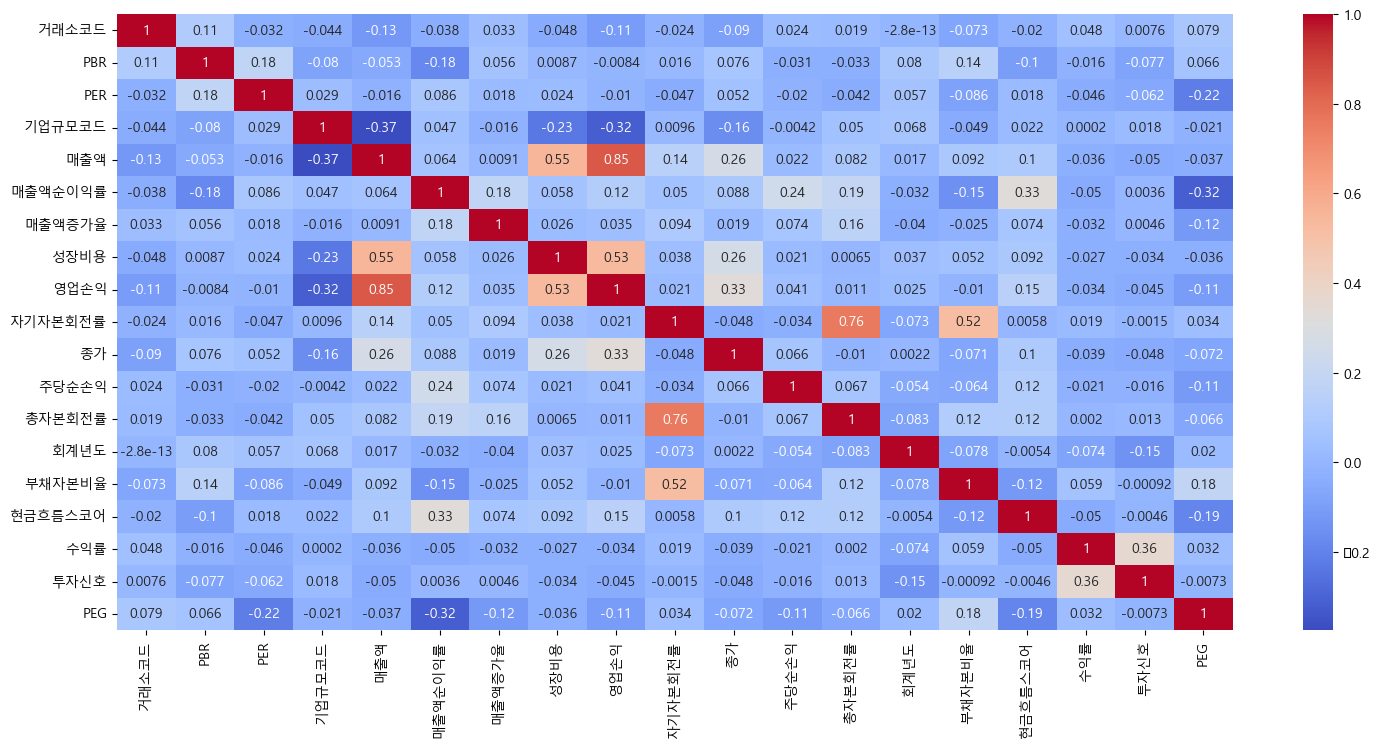

In [48]:
plt.figure(figsize=(18, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [164]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings 
warnings.filterwarnings("ignore")

In [165]:
df = pd.get_dummies(df, columns=['기업규모코드'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 9709
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   거래소코드        8632 non-null   int64  
 1   PBR          8632 non-null   float64
 2   PER          8632 non-null   float64
 3   매출액          8632 non-null   float64
 4   매출액순이익률      8632 non-null   float64
 5   매출액증가율       8632 non-null   float64
 6   성장비용         8632 non-null   float64
 7   영업손익         8632 non-null   float64
 8   자기자본회전률      8632 non-null   float64
 9   종가           8632 non-null   float64
 10  주당순손익        8632 non-null   float64
 11  총자본회전률       8632 non-null   float64
 12  회계년도         8632 non-null   int64  
 13  회사명          8632 non-null   object 
 14  부채자본비율       8632 non-null   float64
 15  현금흐름스코어      8632 non-null   int64  
 16  수익률          8632 non-null   float64
 17  투자신호         8632 non-null   int64  
 18  PEG          8632 non-null   float64
 19  기업규모코드

In [190]:
# 피쳐와 타겟 설정

X = df.drop(['투자신호', '회사명', '종가', '회계년도', '거래소코드', '수익률'], axis=1)
y = df["투자신호"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22,stratify=y)

In [192]:
# feature importance를 볼 수 있는 다른 방법
# permutation importance 는 feature 하나하나마다 shuffle을 하며 성능 변화를 지켜보고, 
# 만약 그 feature가 모델링에서 중요한 역할을 하고 있었다면 성능이 크게 떨어질 것이라는 개념으로 출발
# weight(성능 감소량)가 양수의 값을 가지는 변수들은 모델에 큰 영향을 끼친다는 의미이기 때문에 중요한 feature라고 판단할 수 있음.
# 반면 성능의 변화가 없거나(0), 음수의 값을 가지는 변수들은 모델에 큰 영향을 끼치지 못하는 중요하지 않은 feature라고 판단할 수 있음.

import eli5
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X_test, y_test) 
eli5.show_weights(perm, top = 20, feature_names = X_test.columns.tolist())

Weight,Feature
0.0416 ± 0.0155,PBR
0.0133 ± 0.0119,매출액
0.0066 ± 0.0047,자기자본회전률
0.0053 ± 0.0100,매출액증가율
0.0051 ± 0.0103,PER
0.0047 ± 0.0064,기업규모코드_30.0
0.0039 ± 0.0122,부채자본비율
0.0029 ± 0.0131,총자본회전률
0.0028 ± 0.0092,주당순손익
0.0019 ± 0.0026,기업규모코드_20.0


In [193]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [199]:
from sklearn import metrics

def modeling(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    

de_clf = DecisionTreeClassifier(random_state=200)
ra_clf =RandomForestClassifier(random_state=200)
xgb = XGBClassifier()
log = LogisticRegression(random_state=200)

In [200]:
modeling(de_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1009
           1       0.44      0.49      0.47       718

    accuracy                           0.53      1727
   macro avg       0.53      0.53      0.53      1727
weighted avg       0.54      0.53      0.54      1727

[[566 443]
 [363 355]]


In [201]:
modeling(log, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.59      0.98      0.74      1009
           1       0.59      0.05      0.09       718

    accuracy                           0.59      1727
   macro avg       0.59      0.51      0.41      1727
weighted avg       0.59      0.59      0.47      1727

[[986  23]
 [685  33]]


In [202]:
modeling(ra_clf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1009
           1       0.52      0.43      0.47       718

    accuracy                           0.60      1727
   macro avg       0.58      0.57      0.57      1727
weighted avg       0.59      0.60      0.59      1727

[[726 283]
 [411 307]]


In [203]:
modeling(xgb, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.63      0.58      0.61      1009
           1       0.47      0.53      0.50       718

    accuracy                           0.56      1727
   macro avg       0.55      0.56      0.55      1727
weighted avg       0.57      0.56      0.56      1727

[[589 420]
 [340 378]]


In [390]:
df_1 = df.set_index('회계년도')

In [399]:
test = df_1[df_1.index == 2019]